### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

sys.path.append("..")
import helper as hp

In [3]:
df = pd.read_excel("/Users/michaelmoret/Desktop/Externa/data/pulling/24-02-24/24022024.xlsx")
df.head(6)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,MPa/%,g,mm,kg/mm².%,NaN,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Break Force,Distance to Break,Area St-Strain 1:3,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Start Batch 20240224_Kerling_bleach_W3_,20240224_Kerling_bleach_W3_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20240224_Kerling_bleach_W3_1,20240224_Kerling_bleach_W3_,41.008,72.628,-25.439,761.211,41.0,38.0,breakend,12.5
5,20240224_Kerling_bleach_W3_2,20240224_Kerling_bleach_W3_,37.503,67.397,-26.987,742.341,35.0,35.0,good,12.5


In [4]:
TYPE = "Break Force"

In [5]:
df = df.rename(columns={'Unnamed: 6': 'Diameter 1', 
                        'Unnamed: 7': 'Diameter 2',
                        'Unnamed: 8': 'Note',
                        'Unnamed: 9': 'Humidity',})
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Diameter 1,Diameter 2,Note,Humidity
0,NaN,NaN,MPa/%,g,mm,kg/mm².%,NaN,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Break Force,Distance to Break,Area St-Strain 1:3,NaN,NaN,NaN,NaN


In [6]:
df = df.dropna()
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Diameter 1,Diameter 2,Note,Humidity
4,20240224_Kerling_bleach_W3_1,20240224_Kerling_bleach_W3_,41.008,72.628,-25.439,761.211,41.0,38.0,breakend,12.5
5,20240224_Kerling_bleach_W3_2,20240224_Kerling_bleach_W3_,37.503,67.397,-26.987,742.341,35.0,35.0,good,12.5


In [7]:
df['Break Force'] = df['Break Force'].astype(float)
df['Young\'s Modulus'] = df['Young\'s Modulus'].astype(float)
df['Distance to Break'] = df['Distance to Break'].astype(float)
df['Toughness'] = df['Toughness'].astype(float)
df['Diameter 1'] = df['Diameter 1'].astype(float)
df['Diameter 2'] = df['Diameter 2'].astype(float)
df['Humidity'] = df['Humidity'].astype(float)

df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Diameter 1,Diameter 2,Note,Humidity
4,20240224_Kerling_bleach_W3_1,20240224_Kerling_bleach_W3_,41.008,72.628,-25.439,761.211,41.0,38.0,breakend,12.5
5,20240224_Kerling_bleach_W3_2,20240224_Kerling_bleach_W3_,37.503,67.397,-26.987,742.341,35.0,35.0,good,12.5


In [8]:
df = df[df['Test ID'] != 'Average:']
df = df[df['Test ID'] != 'S.D.']
df = df[df['Test ID'] != 'Coef. of Variation']

In [9]:
df['Average'] = ((df['Diameter 1'] + df['Diameter 2']) / 2 )/1000
df['Area'] = math.pi * (df['Average'] / 2)**2

In [10]:
df['Baseline area'] = math.pi * 0.035**2
df['Updated Young\'s Modulus'] = df['Young\'s Modulus'] * (df['Baseline area'] / df['Area'])

In [11]:
df['Break stress'] = df['Break Force'] / df['Area'] / 1000

In [12]:
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Toughness,Diameter 1,Diameter 2,Note,Humidity,Average,Area,Baseline area,Updated Young's Modulus,Break stress
4,20240224_Kerling_bleach_W3_1,20240224_Kerling_bleach_W3_,41.008,72.628,-25.439,761.211,41.0,38.0,breakend,12.5,0.0395,0.001225,0.003848,128.786541,59.267965
5,20240224_Kerling_bleach_W3_2,20240224_Kerling_bleach_W3_,37.503,67.397,-26.987,742.341,35.0,35.0,good,12.5,0.0350,0.000962,0.003848,150.012000,70.051041


<Figure size 1000x600 with 0 Axes>

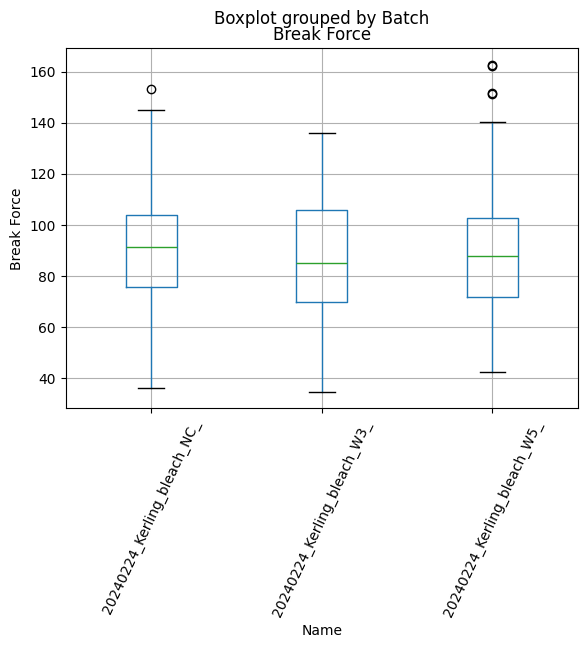

In [13]:
def do_plot(df):
    plt.figure(figsize=(10, 6))
    df.boxplot(column=TYPE, by='Batch')
    plt.xlabel('Name')
    plt.ylabel(TYPE)
    plt.xticks(rotation=65)
    ## y axis from 20 to 90
    #plt.ylim(15, 90)
    plt.show()
    

do_plot(df)


In [14]:
std_by_batch_all = df.groupby('Batch')[TYPE].std()
print(std_by_batch_all)

Batch
20240224_Kerling_bleach_NC_    21.891232
20240224_Kerling_bleach_W3_    22.067986
20240224_Kerling_bleach_W5_    24.404299
Name: Break Force, dtype: float64


In [15]:
unique_values = df['Note'].unique()
print(unique_values)

['breakend' 'good' 'brekend' 'short' 'ok' 'slip' 'almost breakend'
 'short?' 'early' 'ok?' 'weakness' 'early?']


let's explore the effect of the diameter

In [16]:
len(df)

300

In [17]:
mean_diameter1 = df.groupby('Batch')['Diameter 1'].mean()
std_diameter1 = df.groupby('Batch')['Diameter 1'].std()

print("Mean Diameter 1:")
print(mean_diameter1)

print("Standard Deviation Diameter 1:")
print(std_diameter1)

Mean Diameter 1:
Batch
20240224_Kerling_bleach_NC_    50.11
20240224_Kerling_bleach_W3_    49.35
20240224_Kerling_bleach_W5_    50.59
Name: Diameter 1, dtype: float64
Standard Deviation Diameter 1:
Batch
20240224_Kerling_bleach_NC_    6.661960
20240224_Kerling_bleach_W3_    7.391471
20240224_Kerling_bleach_W5_    8.639930
Name: Diameter 1, dtype: float64


In [18]:
#df = df[abs(df['Diameter 1'] - df['Diameter 2']) <= 3]
#len(df)

df = df[(df['Diameter 1'] >= 45) & (df['Diameter 2'] >= 45)]
len(df)

223

<Figure size 1000x600 with 0 Axes>

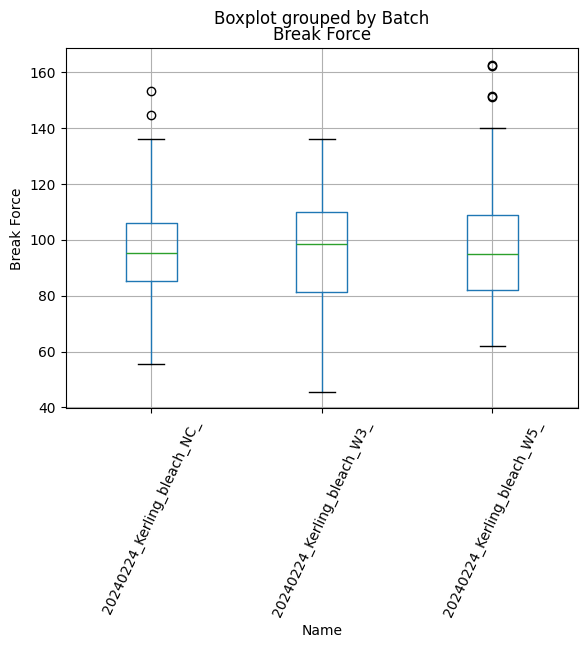

In [19]:
do_plot(df)

let's remove all but ok

In [20]:
len(df)

223

In [21]:
df = df[df['Note'].isin(['ok', 'good'])]
len(df)

101

<Figure size 1000x600 with 0 Axes>

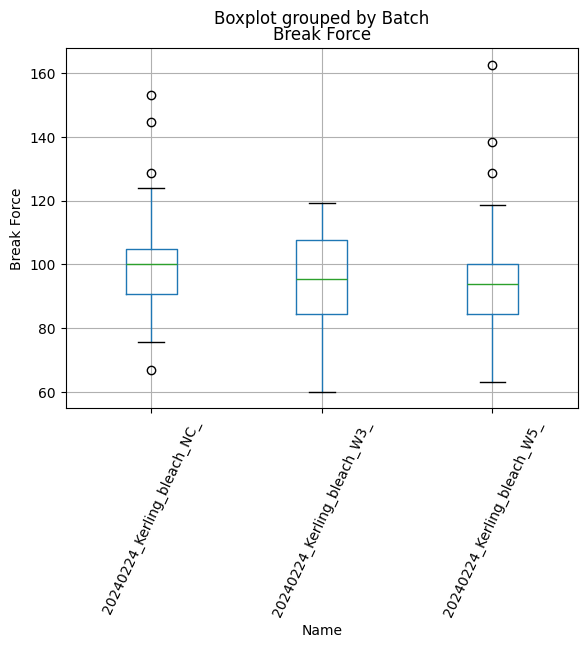

In [22]:
do_plot(df)

In [23]:
std_by_batch_ok = df.groupby('Batch')[TYPE].std()
print(std_by_batch_ok)

Batch
20240224_Kerling_bleach_NC_    17.448691
20240224_Kerling_bleach_W3_    16.705872
20240224_Kerling_bleach_W5_    19.649895
Name: Break Force, dtype: float64


In [24]:
merged_df = pd.concat([std_by_batch_all, std_by_batch_ok], axis=1)
merged_df.columns = ['std all', 'std ok']
merged_df

,std all,std ok
Batch,,
20240224_Kerling_bleach_NC_,21.891232,17.448691
20240224_Kerling_bleach_W3_,22.067986,16.705872
20240224_Kerling_bleach_W5_,24.404299,19.649895


In [25]:
hp.get_pvalue_and_sample_size(df, TYPE)

(                             20240224_Kerling_bleach_W3_  \
 20240224_Kerling_bleach_W3_                        1.000   
 20240224_Kerling_bleach_W5_                        0.458   
 20240224_Kerling_bleach_NC_                        0.469   
 
                              20240224_Kerling_bleach_W5_  \
 20240224_Kerling_bleach_W3_                        0.458   
 20240224_Kerling_bleach_W5_                        1.000   
 20240224_Kerling_bleach_NC_                        0.072   
 
                              20240224_Kerling_bleach_NC_  
 20240224_Kerling_bleach_W3_                        0.469  
 20240224_Kerling_bleach_W5_                        0.072  
 20240224_Kerling_bleach_NC_                        1.000  ,
                              20240224_Kerling_bleach_W3_  \
 20240224_Kerling_bleach_W3_                        -1.00   
 20240224_Kerling_bleach_W5_                   2083018.60   
 20240224_Kerling_bleach_NC_                       142.05   
 
                     